In [12]:
import pandas as pd 
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
titanic_df = pd.read_csv('C:/Users/marga/Noteboooks/.ipynb_checkpoints/train.csv', low_memory = False)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


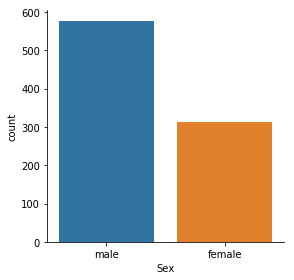

In [14]:
sns.factorplot("Sex", data=titanic_df, kind = "count")

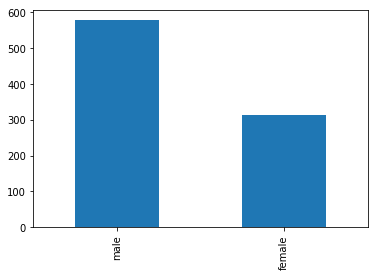

In [13]:
titanic_df["Sex"].value_counts().plot.bar()

plt.show()

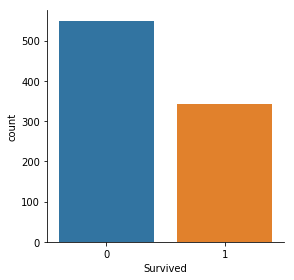

In [15]:
sns.factorplot("Survived", data=titanic_df, kind = "count")

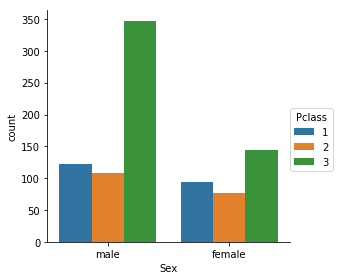

In [16]:
sns.factorplot("Sex", data=titanic_df, kind = "count", hue = 'Pclass')

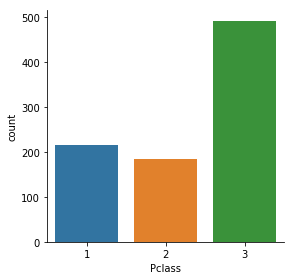

In [17]:
sns.factorplot("Pclass", data=titanic_df, kind = "count")

In [24]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [25]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [26]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


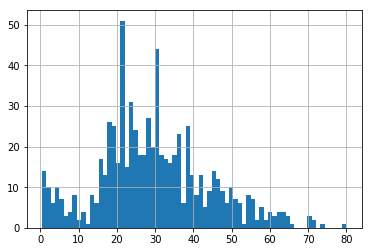

In [27]:
titanic_df['Age'].hist(bins = 70)

In [28]:
titanic_df['Age'].mean()

29.69911764705882

In [32]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [34]:
deck = titanic_df['Cabin'].dropna()

In [36]:
deck.head() 


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [37]:
levels = []
for level in deck:
    levels.append(level[0])

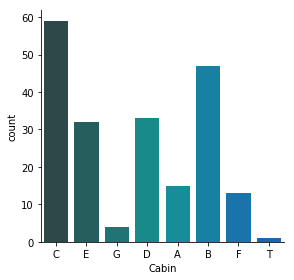

In [39]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'winter_d')

In [40]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

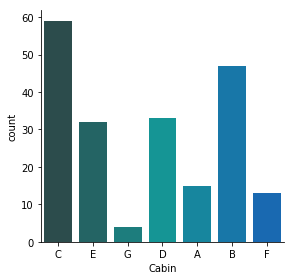

In [41]:
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'winter_d')

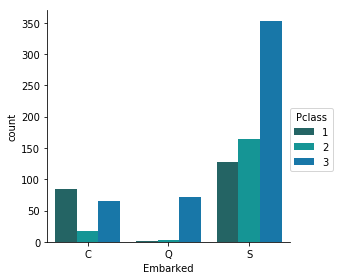

In [43]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', palette = 'winter_d', hue = 'Pclass', order = ['C', 'Q', 'S'])

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [45]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [47]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With family'

C:\Users\marga\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\marga\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [50]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


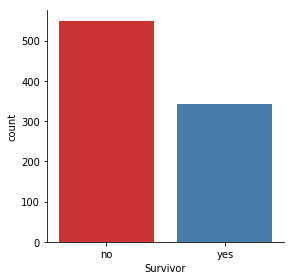

In [52]:
sns.factorplot('Survivor', data = titanic_df, kind = 'count', palette = 'Set1')

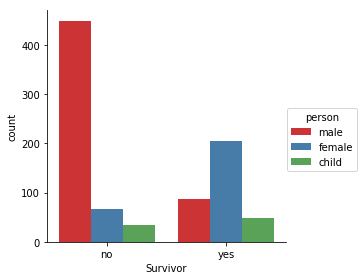

In [53]:
sns.factorplot('Survivor', data = titanic_df, kind = 'count', palette = 'Set1', hue = 'person')

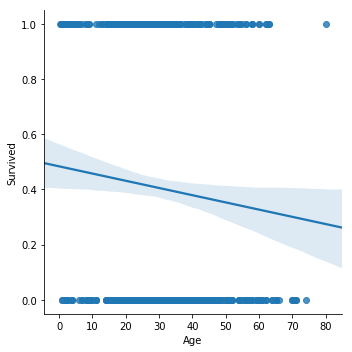

In [59]:
sns.lmplot('Age', 'Survived', data = titanic_df)

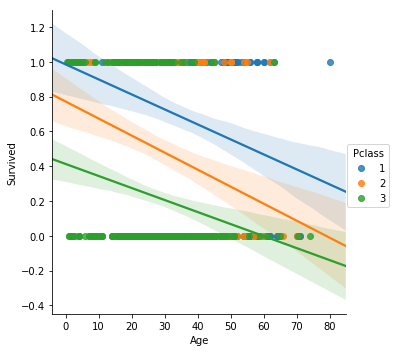

In [60]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass')

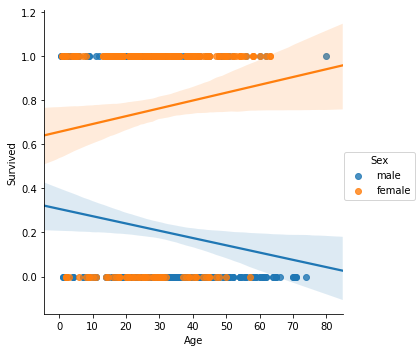

In [61]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Sex')

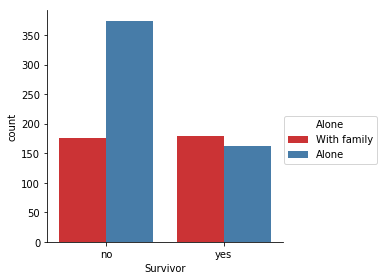

In [62]:
sns.factorplot('Survivor', data=titanic_df, hue = 'Alone', palette = 'Set1', kind = 'count')

In [64]:
titanic_df.to_csv('C:/Users/marga/Noteboooks/.ipynb_checkpoints/titanicModified.csv')

In [66]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


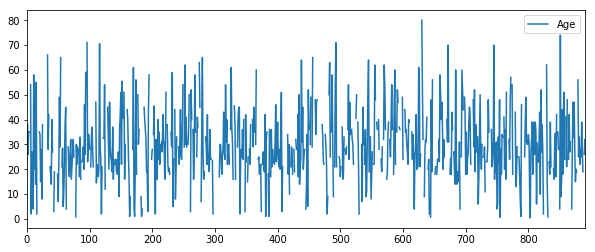

In [70]:
titanic_df['Age'].plot(legend=True, figsize=(10,4))

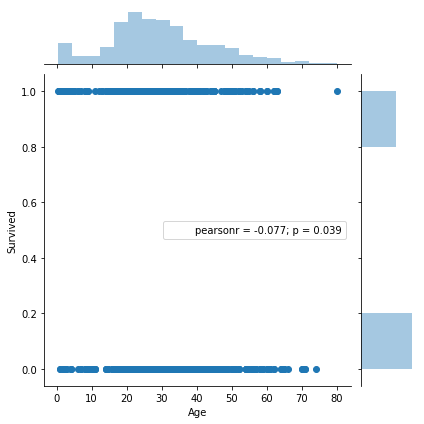

In [73]:
sns.jointplot('Age', 'Survived', data = titanic_df,  kind = 'scatter')

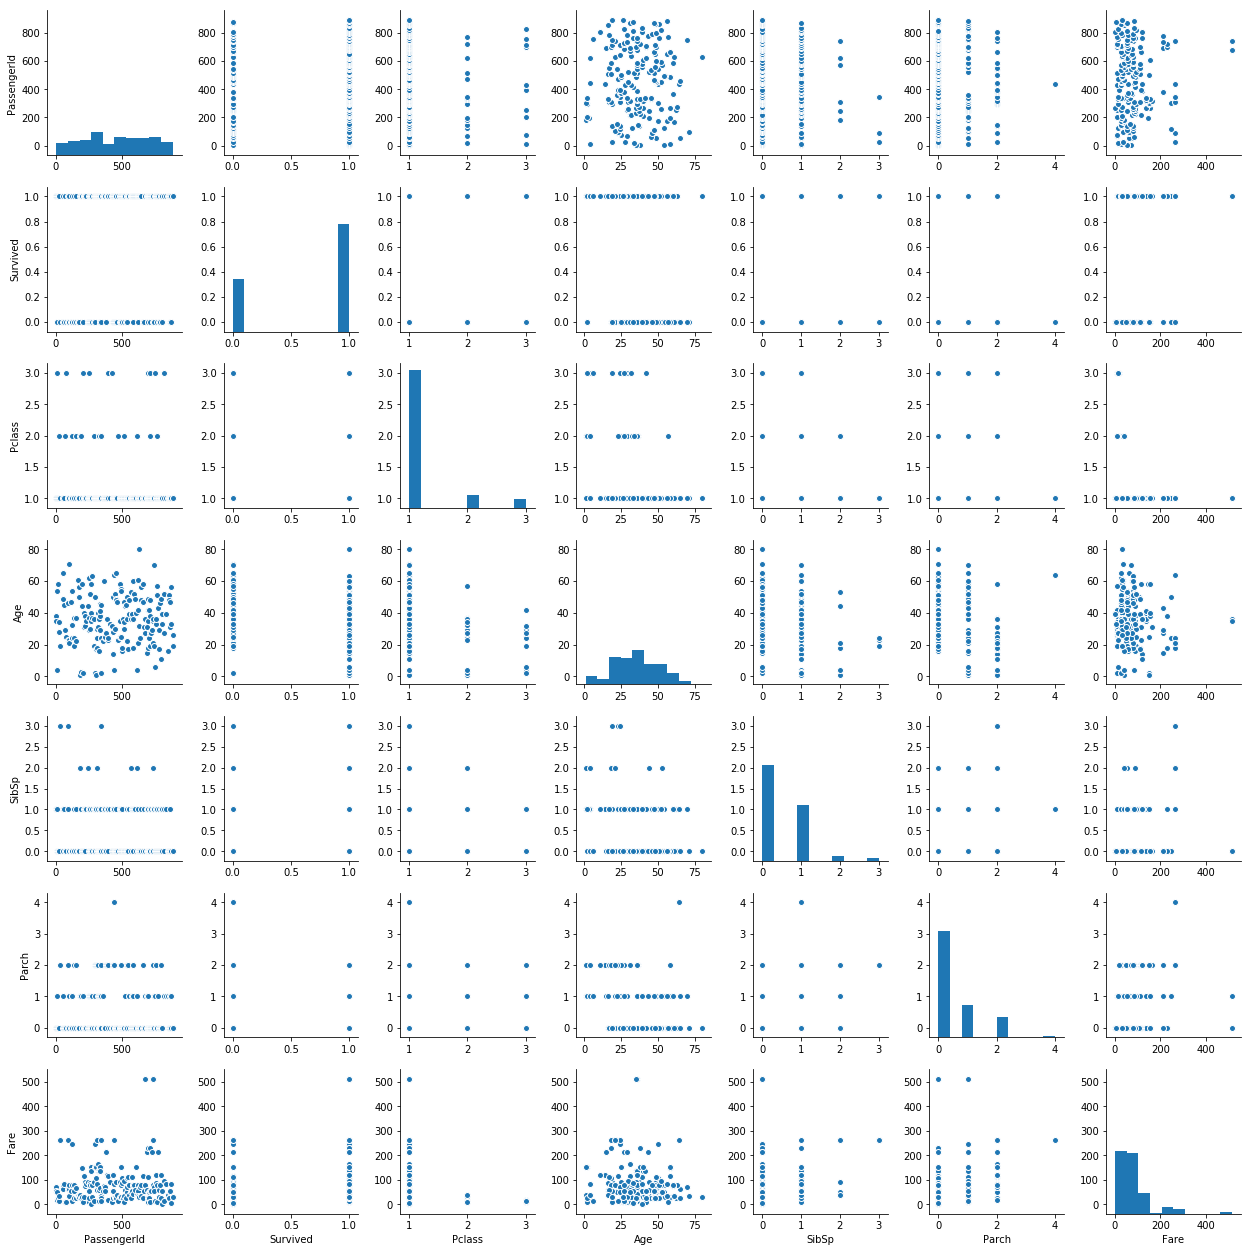

In [74]:
sns.pairplot(titanic_df.dropna())

In [82]:
ax = sns.heatmap(titanic_df, vmin = 0, vmax = 1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [83]:
titanic_df['Age'].quantile(0.05)

4.0

In [84]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [85]:
titanic_df['Fare'].quantile(0.05)

7.225

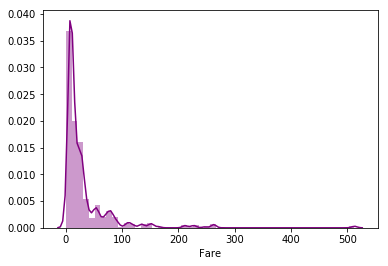

In [88]:
sns.distplot(titanic_df['Fare'].dropna(), color = 'purple')